In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
with open('train.pkl', 'rb') as l:
    train = pickle.load(l)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
train.head()

,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsSuite,...,Census_ActivationChannel,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,59,7757,53447.0,1.0,29,128035.0,18.0,35.0,-85,256,...,2,5,628.0,36144.0,0,0,0.0,0.0,10.0,0
1,26,6260,53447.0,1.0,93,1482.0,18.0,119.0,64,256,...,2,2,628.0,57858.0,0,0,0.0,0.0,8.0,0
2,59,7628,53447.0,1.0,86,153579.0,18.0,64.0,49,768,...,1,5,142.0,52682.0,0,0,0.0,0.0,3.0,0
3,59,7679,53447.0,1.0,88,20710.0,0.0,117.0,115,256,...,1,5,355.0,20050.0,0,0,0.0,0.0,3.0,1
4,59,7638,53447.0,1.0,18,37376.0,0.0,277.0,75,768,...,2,5,355.0,19844.0,0,0,0.0,0.0,1.0,1


In [3]:
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y_true, y_scores)

0.75

In [4]:
import lightgbm as lgb

In [5]:
from sklearn.utils import shuffle
train = shuffle(train)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
def get_baseline(x_train, x_test, y_train, y_test):
    gbm = lgb.LGBMClassifier(metric='binary_logloss', silent=True, n_jobs=4)
    gbm.fit(x_train, y_train)
    score = roc_auc_score(y_test.values, gbm.predict_proba(x_test)[:,1])
    return score

In [8]:
from tqdm import tqdm_notebook as tqdm
results = []
X, y = train.loc[:, train.columns != 'HasDetections'], train['HasDetections']
X_test = X[:773079]
y_test = y[:773079]
X = X[773079:]
y = y[773079:]
for i in tqdm(range(1, 11)):
    r = get_baseline(X[:i*695771], X_test, y[:i*695771], y_test)
    print(i, r, '\n')
    results.append(r)

A Jupyter Widget

1 0.7148479871343499 

2 0.7158991070901644 

3 0.7157535649260136 

4 0.7157298159455907 

5 0.7157617945063127 

6 0.7155827056366297 

7 0.7157993959986646 

8 0.7157331198382777 

9 0.7159258336318978 

10 0.7158610188715997 




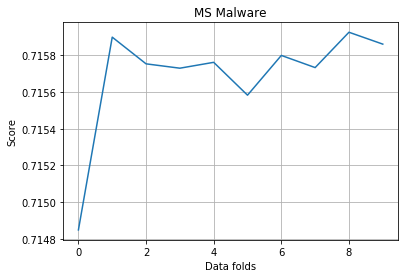

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots()
ax.plot(results)

ax.set(xlabel='Data folds', ylabel='Score',
       title='MS Malware')

ax.grid()
plt.show()